<a href="https://colab.research.google.com/github/kurtlee1984/20210602/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
#dataFrame: 表格, series: 一行//一列
df = pd.DataFrame(iris["data"],
                  columns = iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index = False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
#回傳新值,會產生新表格,不影響原表格
df.drop(["ans"], axis=1)
#df_new = df.drop(["ans"], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
#原表格不影響
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
# from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], test_size=0.25)
# train_test_split([1, 2, 3, 4],
#                  {5, 6, 7, 8],
#                   test_size=0.25)

In [46]:
#sklearn前,pandas.DataFrame
#sklearn後,np.arry
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])
# 90% x , 10%x ,90%y, 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(135, 4)
(15, 4)
(135,)
(15, 4)


In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(223.2, 453.0, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [46, 46, 43]\nclass = setosa'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 271.8, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 89\nvalue = [0, 46, 43]\nclass = versicolor'),
 Text(223.2, 90.59999999999997, 'gini = 0.15\nsamples = 49\nvalue = [0, 45, 4]\nclass = versicolor'),
 Text(446.4, 90.59999999999997, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica')]

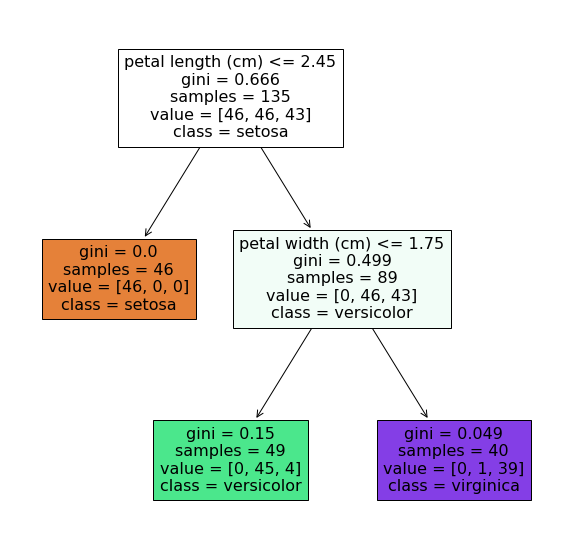

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10 ))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled = True)

In [49]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333